## API: Application Programming Interface

This tutorial is about extracting data from web-APIs. 
It is heavily based on the data science lectures COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/, and 
the https://www.dataquest.io/blog/python-api-tutorial/ blog.

APIs are used to retrieve data from websites (e.g. Twitter). 

We will start by querying an API to retrieve data about the International Space Station (ISS). 

In [1]:
import requests 
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")

response

<Response [200]>

200 is a status code and means everything went ok, and the result has been returned. If e.g. it was 404, it would mean the resource we tried to access was not found on the server.

Let's look at our successful response:

In [2]:
response.content

b'{"message": "success", "iss_position": {"longitude": "0.3427", "latitude": "37.1705"}, "timestamp": 1534863707}'

Let's check what type of data form is used:

In [3]:
response.headers['content-type']

'application/json'

JSON stands for JavaScript Object Notation. We can decode this object and make JSON readable:

In [4]:
response_j = response.content.decode("utf-8")
print(response_j)

{"message": "success", "iss_position": {"longitude": "0.3427", "latitude": "37.1705"}, "timestamp": 1534863707}


We have key-value pairs, just like a dictionary.

We can use the [json library](https://docs.python.org/3/library/json.html) to convert JSON into objects:

In [5]:
import json
response_d = json.loads(response_j)
print(type(response_d))
print(response_d)
response_d["iss_position"]

<class 'dict'>
{'message': 'success', 'iss_position': {'longitude': '0.3427', 'latitude': '37.1705'}, 'timestamp': 1534863707}


{'latitude': '37.1705', 'longitude': '0.3427'}

Pandas can also load a json object:

In [6]:
import pandas as pd 

df = pd.read_json(response_j)
df

,iss_position,message,timestamp
latitude,37.1705,success,2018-08-21 15:01:47
longitude,0.3427,success,2018-08-21 15:01:47


What we would really like is one row per timestamp and longitude and latitude as columns:

In [7]:
def flatten(response_d):
    response_d["latitude"] = response_d["iss_position"]["latitude"]
    response_d["longitude"] = response_d["iss_position"]["longitude"]
    del(response_d["iss_position"])
    return response_d

flatten(response_d)

{'latitude': '37.1705',
 'longitude': '0.3427',
 'message': 'success',
 'timestamp': 1534863707}

Now let's get ISS positions over time and save it as an array:

In [8]:
import time

def pull_position():
    """Retreives the position of the ISS and returns it as a flat dictionary"""
    response = requests.get("http://api.open-notify.org/iss-now.json")
    response_j = response.content.decode("utf-8")
    response_d = json.loads(response_j)
    flat_response = flatten(response_d)
    return flat_response    

iss_position = []
    
# calls pull_position 10 times with 3 seconds break
for i in range(10):
    flat_response = pull_position()
    iss_position.append(flat_response)
    print(flat_response)
    time.sleep(3)
    
len(iss_position)

{'message': 'success', 'timestamp': 1534863708, 'latitude': '37.1296', 'longitude': '0.4022'}
{'message': 'success', 'timestamp': 1534863711, 'latitude': '37.0071', 'longitude': '0.5798'}
{'message': 'success', 'timestamp': 1534863715, 'latitude': '36.8636', 'longitude': '0.7862'}
{'message': 'success', 'timestamp': 1534863718, 'latitude': '36.7404', 'longitude': '0.9625'}
{'message': 'success', 'timestamp': 1534863721, 'latitude': '36.5962', 'longitude': '1.1674'}
{'message': 'success', 'timestamp': 1534863725, 'latitude': '36.4517', 'longitude': '1.3715'}
{'message': 'success', 'timestamp': 1534863728, 'latitude': '36.3274', 'longitude': '1.5459'}
{'message': 'success', 'timestamp': 1534863731, 'latitude': '36.1821', 'longitude': '1.7484'}
{'message': 'success', 'timestamp': 1534863734, 'latitude': '36.0573', 'longitude': '1.9214'}
{'message': 'success', 'timestamp': 1534863738, 'latitude': '35.9113', 'longitude': '2.1224'}


10

Let's put this data into a dataframe and see how it looks:

In [9]:
iss_position_df = pd.DataFrame(iss_position)
iss_position_df['timestamp']  = pd.to_datetime(iss_position_df['timestamp'], unit="s")

iss_position_df = iss_position_df.set_index(pd.DatetimeIndex(iss_position_df['timestamp']))
iss_position_df["latitude"] = iss_position_df["latitude"].map(float)
iss_position_df["longitude"] = iss_position_df["longitude"].map(float)

In [10]:
iss_position_df

,latitude,longitude,message,timestamp
timestamp,,,,
2018-08-21 15:01:48,37.1296,0.4022,success,2018-08-21 15:01:48
2018-08-21 15:01:51,37.0071,0.5798,success,2018-08-21 15:01:51
2018-08-21 15:01:55,36.8636,0.7862,success,2018-08-21 15:01:55
2018-08-21 15:01:58,36.7404,0.9625,success,2018-08-21 15:01:58
2018-08-21 15:02:01,36.5962,1.1674,success,2018-08-21 15:02:01
2018-08-21 15:02:05,36.4517,1.3715,success,2018-08-21 15:02:05
2018-08-21 15:02:08,36.3274,1.5459,success,2018-08-21 15:02:08
2018-08-21 15:02:11,36.1821,1.7484,success,2018-08-21 15:02:11
2018-08-21 15:02:14,36.0573,1.9214,success,2018-08-21 15:02:14


Let's plot the movement:

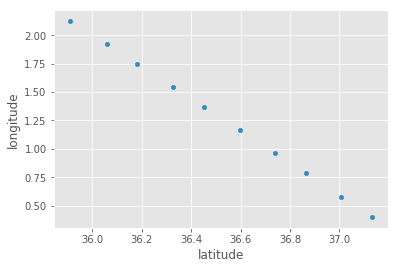

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
iss_position_df.plot(kind="scatter", x="latitude", y="longitude")
plt.show()

A list of Python wrappers for popular APIs (e.g. Amazon, Ebay, Facebook) can be found here: https://github.com/realpython/list-of-python-api-wrappers

Let's play with the Python wrapper for the Twitter API, called Twython (https://twython.readthedocs.io/en/latest/)! 

Most professional APIs will require you to authenticate and will limit you in what you can do – mostly they limit how much data you can retreive at a certain time. To run the following code, you'll have to put in your own credentials, so follow the procedure below: 

Install twython:
`pip install twython`

* Go to https://apps.twitter.com/ and create a new app
* Save your consumer key and consumer secret in a file `credentials.py` in the format:
```python
CONSUMER_KEY = "KEY"
CONSUMER_SECRET = "KEY"
```

But before we get started, let's check out what a tweet looks like here: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

In [12]:
from twython import Twython
# credentials is a local file with your own credentials. It defines CONSUMER_KEY and CONSUMER_SECRET
from credentials_alkistis import * 
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

Here, we have created the Twython library object and authenticated against our user.

Now let's search for a hashtag:

In [13]:
tag = "#BigData"
result = twitter.search(q=tag, tweet_mode="extended")
result

{'search_metadata': {'completed_in': 0.075,
  'count': 15,
  'max_id': 1031919359780892672,
  'max_id_str': '1031919359780892672',
  'next_results': '?max_id=1031919224325693439&q=%23BigData&include_entities=1',
  'query': '%23BigData',
  'refresh_url': '?since_id=1031919359780892672&q=%23BigData&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Tue Aug 21 15:02:02 +0000 2018',
   'display_text_range': [0, 125],
   'entities': {'hashtags': [{'indices': [37, 45], 'text': 'bigdata'}],
    'media': [{'display_url': 'pic.twitter.com/v8ifbwLhIq',
      'expanded_url': 'https://twitter.com/SAGEmedia_comm/status/1031919359780892672/photo/1',
      'id': 1031919357998198785,
      'id_str': '1031919357998198785',
      'indices': [126, 149],
      'media_url': 'http://pbs.twimg.com/media/DlIdMFJU8AEfOwL.jpg',
      'media_url_https': 'https://pbs.twimg.com/media/DlIdMFJU8AEfOwL.jpg',
      'sizes': {'lar

The result is an array of tweets. Let's see a couple of them separately:

In [14]:
result["statuses"][0]["full_text"]

'Enjoy access to selected research in #bigdata for a limited time, and explore other related resources https://t.co/vgPMlOt0SN https://t.co/v8ifbwLhIq'

In [15]:
result["statuses"][1]["full_text"]

'RT @DeepLearn007: Gartner serves up 2018 Hype Cycle with a heavy side of AI\nImage Source: https://t.co/90NoF4IqvG\n#AI #MachineLearning #Dee…'

In [16]:
#print all the tweets
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

Enjoy access to selected research in #bigdata for a limited time, and explore other related resources https://t.co/vgPMlOt0SN https://t.co/v8ifbwLhIq
----
RT @DeepLearn007: Gartner serves up 2018 Hype Cycle with a heavy side of AI
Image Source: https://t.co/90NoF4IqvG
#AI #MachineLearning #Dee…
----
RT schmarzo: Use this #infographic to dodge #DigitalTransformation #DataMonetization inhibitors!

Why #DigitalTransformation Is So Dang Hard? https://t.co/uvv19MQAYw
HitachiVantara CloudExpo ipfconline1 Ronald_vanLoon KirkDBorne antgrasso #BigData #DataScience #Economics #Desig… https://t.co/isNOBTLBxP
----
RT @BigData_Joe: 10 industries for #AI and #BigData to create big value &gt;&gt; @MikeQuindazzi &gt;&gt; #IoT #SocialMedia #DataScience #DataAnalytics…
----
RT dez_blanchfield: What Data Scientists Really Do https://t.co/aE6beLGYsR #data #science #datascience #ai #winwithai #DataScientists #DataScientist #bigdata #analytics #cloud #iot #iiot #dataviz #DataSecurity #datafree #bitcoin #Blo

We can also search for tweets based on usernames:

In [17]:
result = twitter.search(q="@SKA_Africa",  tweet_mode="extended")
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

RT @imogenwhittam: Hanging out with the awesome MeerKAT image of the galactic centre! @SKA_Africa @SKA_telescope #IAU2018 #WhyNotInAfrica #…
----
RT @govender: The super impressive #MeerKAT image shows up in #FM13. @AstronoVee uses this as a demonstration of what has been achieved aft…
----
RT @imogenwhittam: Hanging out with the awesome MeerKAT image of the galactic centre! @SKA_Africa @SKA_telescope #IAU2018 #WhyNotInAfrica #…
----
RT @UWC_Astro: The Centre for Radio Cosmology here at @UWC_Astro @UWConline is offering is offering MSc and PhD Bursaries in Cosmology in 2…
----
Hanging out with the awesome MeerKAT image of the galactic centre! @SKA_Africa @SKA_telescope #IAU2018 #WhyNotInAfrica #IAU2024CT #CapeTown2024 #ItsTimeForAfrica! https://t.co/iDbITiuX0H
----
RT @govender: The super impressive #MeerKAT image shows up in #FM13. @AstronoVee uses this as a demonstration of what has been achieved aft…
----
RT @govender: McBride: Africa is open for science! @AstronoVee @SAAO @SKA_Afri

This returns all tweets that are mentioning a username. We can also explicitly get the tweets of a person. 

In [18]:
#twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# count is limited to the last 3200 tweets of a user, a max of 200 per request
the_SKA_result = twitter.get_user_timeline(screen_name="SKA_Africa", count=50)
the_SKA_result

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Jul 25 15:27:39 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/1022141336957452289',
     'indices': [117, 140],
     'url': 'https://t.co/MDm1v1WY1H'}],
   'user_mentions': []},
  'favorite_count': 35,
  'favorited': False,
  'geo': None,
  'id': 1022141336957452289,
  'id_str': '1022141336957452289',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 23,
  'retweeted': False,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'text': 'Radio astronomy in South Africa featured prominently when the President of the Republic of South A

Let's count the numbers for favorites and retweets:

In [19]:
the_SKA_favorites = []
the_SKA_retweets = []
for status in the_SKA_result:
    print(status["text"])
    print(status["favorite_count"])
    print("----")
    the_SKA_favorites.append(status["favorite_count"])
    the_SKA_retweets.append(status["retweet_count"])

Radio astronomy in South Africa featured prominently when the President of the Republic of South Africa, His Excell… https://t.co/MDm1v1WY1H
35
----
#MeerKATunveiled #MeerKAT @dstgovza @NRF_News @SKA_telescope @skasa_outreach https://t.co/jYuVhFz3Co
15
----
RT @eddebeket: WTH? 😳 
Wow! https://t.co/egjAjNYgiD
0
----
RT @PASTEvolve: Congratulations to @SKA_Africa @SKA_telescope - PAST explores the shared origins of humankind and life, SKA explores the or…
0
----
#MeerKATunveiled #MeerKAT @dstgovza @NRF_News @SKA_telescope @skasa_outreach https://t.co/gxJrGvmdKW
3
----
Thank you Francisco and JIVE! #MeerKATunveiled @NRF_News @skasa_outreach https://t.co/TsMGYKdBrW
3
----
RT @PASTEvolve: Incredibly proud of this milestone, the link below includes further details about this image of the centre of our Milky Way…
0
----
RT @reneehlozek: MeerKat LADUUUUUMAA!!!! #science #radio #astronomy #astrotastic https://t.co/jFx1gHkMTM
0
----
RT @chris_tibbs: Check out this stunning #MeerKAT image of the 

And let's create DataFrames and explore the stats:

In [20]:
SKA_stats = pd.DataFrame({
        "The SKA Fav":the_SKA_favorites,
        "The SKA RT":the_SKA_retweets
    })

In [21]:
SKA_stats.head()

,The SKA Fav,The SKA RT
0,35,23
1,15,3
2,0,2
3,0,4
4,3,0


In [22]:
SKA_stats.describe()

,The SKA Fav,The SKA RT
count,49.000000,49.000000
mean,1.224490,3.142857
std,5.409349,3.458082
min,0.000000,0.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,0.000000,4.000000
max,35.000000,23.000000


Sort and plot:

In [23]:
SKA_stats = SKA_stats.sort_values("The SKA Fav")
SKA_stats = SKA_stats.reset_index(drop=True)
SKA_stats.head(10)

,The SKA Fav,The SKA RT
0,0,2
1,0,4
2,0,3
3,0,4
4,0,3
5,0,1
6,0,3
7,0,3
8,0,2
9,0,4


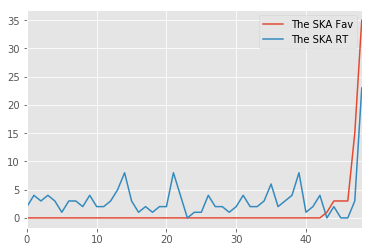

In [24]:
SKA_stats.plot()
plt.show()